In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
import os

In [ ]:
os.listdir('/gdrive/MyDrive/kaggle/')

['model_weights.h5',
 'train_encoded_images.p',
 'kaggle.json',
 'flickr8k.zip',
 'Flickr_Data',
 'flickr_data']

In [ ]:
os.getcwd()


'/content'

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/kaggle'


In [ ]:
import pandas as pd
import numpy as np
import keras
import nltk
from nltk.corpus import stopwords
import string
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50 , preprocess_input , decode_predictions
from keras.preprocessing import image
from keras.models import Model,load_model
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import *
from keras.layers.merge import add

In [ ]:
os.chdir('/content')


In [ ]:
!kaggle datasets download -d watts2/glove6b50dtxt

 96% 65.0M/67.7M [00:03<00:00, 15.4MB/s]
100% 67.7M/67.7M [00:03<00:00, 18.8MB/s]


In [ ]:
os.getcwd()

'/content/Flickr_Data/Flickr_Data'

In [ ]:
os.chdir('/content/Flickr_Data/Flickr_Data')

In [ ]:
!cp '/gdrive/MyDrive/kaggle/flickr8k.zip' .

In [ ]:
!unzip -q 'flickr8k.zip'

In [ ]:
os.listdir()

['Flickr_TextData', 'flickr8ktextfiles', 'Images']

In [ ]:
def readtext(path):
  with open(path) as f :
    captions = f.read()
  return captions


In [ ]:
captions = readtext("/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt")
captions = captions.split("\n")[:-1]
print(len(captions))

40460


In [ ]:
first , second = captions[0].split('\t')
print(first)

1000268201_693b08cb0e.jpg#0


In [ ]:
# Dictionary to map images with list of captions it has

descriptions = {}

for x in captions:
  first , second = x.split('\t')
  imgn = first.split(".")[0]

  if descriptions.get(imgn) is None:
    descriptions[imgn] = []
  
  descriptions[imgn].append(second)

In [ ]:
imgp = "/content/Flickr_Data/Flickr_Data/Images/"
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(imgp + "42637986_135a9786a6")

Data Cleaning

In [ ]:
 import re
 def cleantxt(sent):
   sent = sent.lower()
   sent = re.sub("[^a-z]+"," ",sent)
   sent = sent.split()

   sent = [s for s in sent if len(s)>1]
   sent = " ".join(sent)
   return sent

In [ ]:
print(cleantxt("a cat is sitiing Over the house 64"))


cat is sitiing over the house


In [ ]:
for key,captionl in descriptions.items():
  for i in range(len(captionl)):
    captionl[i] = cleantxt(captionl[i])

In [ ]:
#Vocab

vocab = set()
for key in descriptions.keys():
  [vocab.update(sent.split()) for sent in descriptions[key]]

In [ ]:
tot = []

for key in descriptions.keys():
  [tot.append(i) for des in descriptions[key] for i in des.split()]

print(len(tot))

373837


In [ ]:
import collections 

count = collections.Counter(tot)
freq = dict(count)
print(len(freq.keys()))

8424


In [ ]:
sortedf = sorted(freq.items(),reverse = True, key = lambda x:x[1])
tt = 10
sortedf = [x for x in sortedf if x[1]>tt]
tot = [x[0] for x in sortedf]

In [ ]:
print(len(tot))

1845


In [ ]:
with open('/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt') as f:
    trainf = f.read()

In [ ]:
with open('/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt') as f:
    testf = f.read()

In [ ]:
train = [row.split(".")[0] for row in trainf.split("\n")[:-1]]
print(train)

['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154', '2851304910_b5721199bc', '3423802527_94bd2b23b0', '3356369156_074750c6cc', '2294598473_40637b5c04', '1191338263_a4fa073154', '2380765956_6313d8cae3', '3197891333_b1b0fd1702', '3119887967_271a097464', '2276499757_b44dc6f8ce', '2506892928_7e79bec613', '2187222896_c206d63396', '2826769554_85c90864c9', '3097196395_ec06075389', '3603116579_4a28a932e2', '3339263085_6db9fd0981', '2532262109_87429a2cae', '2076906555_c20dc082db', '2502007071_82a8c639cf', '3113769557_9edbb8275c', '3325974730_3ee192e4ff', '1655781989_b15ab4cbff', '1662261486_db967930de', '2410562803_56ec09f41c', '2469498117_b4543e1460', '69710415_5c2bfb1058', '3414734842_beb543f400', '3006217970_90b42e6b27', '2192411521_9c7e488c5e', '3535879138_9281dc83d5', '2685788323_ceab14534a', '34

In [ ]:
test = [row.split(".")[0] for row in testf.split("\n")[:-1]]
print(test)

['3385593926_d3e9c21170', '2677656448_6b7e7702af', '311146855_0b65fdb169', '1258913059_07c613f7ff', '241347760_d44c8d3a01', '2654514044_a70a6e2c21', '2339106348_2df90aa6a9', '256085101_2c2617c5d0', '280706862_14c30d734a', '3072172967_630e9c69d0', '3482062809_3b694322c4', '1167669558_87a8a467d6', '2847615962_c330bded6e', '3344233740_c010378da7', '2435685480_a79d42e564', '3110649716_c17e14670e', '2511019188_ca71775f2d', '2521770311_3086ca90de', '2723477522_d89f5ac62b', '2218609886_892dcd6915', '3745451546_fc8ec70cbd', '2844018783_524b08e5aa', '3100251515_c68027cc22', '2207244634_1db1a1890b', '2943023421_e297f05e11', '3286822339_5535af6b93', '2479652566_8f9fac8af5', '1394368714_3bc7c19969', '872622575_ba1d3632cc', '2309860995_c2e2a0feeb', '241347204_007d83e252', '3502343542_f9b46688e5', '757332692_6866ae545c', '2748729903_3c7c920c4d', '494792770_2c5f767ac0', '3213992947_3f3f967a9f', '2295750198_6d152d7ceb', '2358898017_24496b80e8', '3222055946_45f7293bb2', '444481722_690d0cadcf', '2647049

In [ ]:
traind = {}

for imgid in train:
  traind[imgid] = []
  for cap in descriptions[imgid]:
    capp = "ss " + cap + " es"
    traind[imgid].append(capp)

In [ ]:
traind["42637986_135a9786a6"]

['ss silhouette of two people sitting on dock at sunset es',
 'ss two people are sitting on wooden dock on lake at sunset es',
 'ss two people sit on dock with sunset in the background es',
 'ss two people sit on the pier together and look out at the ocean es',
 'ss two people sitting on dock under lamp post with clouds in the sky beyond them es']

Tranfer Learning , image extraction

In [ ]:
model = ResNet50(weights = "imagenet", input_shape= (224,224,3))
model.summary()

102973440/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
modeln = Model(model.input,model.layers[-2].output)

In [ ]:
def preimg(img):
  img = image.load_img(img,target_size= (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)

  img = preprocess_input(img)
  return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


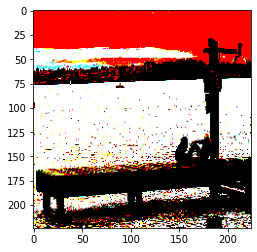

In [ ]:
img = preimg(imgp + "42637986_135a9786a6.jpg")
plt.imshow(img[0])

In [ ]:
def encode(img):
  img = preimg(img)
  featurevec = modeln.predict(img)
  featurevec = featurevec.reshape((-1,))
  print(featurevec.shape)
  return featurevec

In [ ]:
encode(imgp + "42637986_135a9786a6.jpg")

(2048,)


array([0.11230186, 0.54248524, 0.        , ..., 0.01362082, 0.17443003,
       0.22488488], dtype=float32)

In [ ]:
encodet = {}
start = time()
for ix,imgid in enumerate(train):
  imgpp = imgp + "/" +imgid+ ".jpg"
  encodet[imgid] = encode(imgpp)

  if ix%100 ==0:
    print(ix)

endt = time()
print(endt - start)

Streaming output truncated to the last 5000 lines.
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
1100
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


NameError: ignored

In [ ]:
encodet['1000268201_693b08cb0e']

array([0.06535929, 0.16782546, 0.32517618, ..., 0.05107123, 0.32821226,
       1.004337  ], dtype=float32)

In [ ]:
with open("encodedtrain.pkl","wb") as f:
  pickle.dump(encodet,f)

In [ ]:
encodetest = {}
start = time()
for ix,imgid in enumerate(test):
  imgpp = imgp + "/" +imgid+ ".jpg"
  encodetest[imgid] = encode(imgpp)

  if ix%100 ==0:
    print(ix)

endt = time()
print(endt - start)

(2048,)
0
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
100
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2

NameError: ignored

In [ ]:
with open("encodedtest.pkl","wb") as f:
  pickle.dump(encodetest,f)

In [ ]:
from google.colab import files
files.download('encodedtrain.pkl')

files.download('encodedtest.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(tot)

1845

Captions Preprocessing


In [ ]:
word2idx = {}
idx2word = {}

for i,word in enumerate(tot):
  word2idx[word] = i+1
  idx2word[i+1] = word

In [ ]:
idx2word[1846] = 'ss'
word2idx['ss'] = 1846

idx2word[1847] = 'es'
word2idx['es'] = 1847

vocab_size = len(word2idx) +1

In [ ]:
maxx = 0

for key in traind.keys():
  for cap in traind[key]:
    maxx = max(maxx, len(cap.split()))

print(maxx)

35


Data Generator

In [ ]:
def datagen(traind,encodet,word2idx,maxx,batch):
  x1,x2,y = [],[],[]

  n=0
  while True:
    for key , descl in traind.items():
      n +=1

      photo = encodet[key]
      for desc in descl:
        seq = [word2idx[word] for word in desc.split() if word in word2idx]
        for i in range(1,len(seq)):
          xi = seq[0:i]
          yi = seq[i]

          xi = pad_sequences([xi],maxlen= maxx,value =0,padding = 'post')[0]
          yi = to_categorical([yi],num_classes=vocab_size)[0]

          x1.append(photo)
          x2.append(xi)
          y.append(yi)
        
        if n == batch:
          yield [[np.array(x1),np.array(x2)],np.array(y)]
          x1,x2,y = [],[],[]
          n=0
           


Word Embeddings

In [ ]:
f = open("/gdrive/MyDrive/glove.6B.50d.txt",encoding = 'utf8')

embedidx = {}

for line in f :
  values = line.split()

  word = values[0]
  worded = np.array(values[1:], dtype = 'float')
  embedidx[word] = worded 



In [ ]:
f.close()

In [ ]:
embed['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [ ]:
def getembed():
  edim = 50
  mat = np.zeros((vocab_size,edim))
  for word,idx in word2idx.items():
    embedvec = embedidx.get(word)

    if embedvec is not None:
      mat[idx] = embedvec

  return mat

In [ ]:
embedmat =  getembed()
embedmat.shape

(1848, 50)

Model Architecture

In [ ]:
inputimg = Input(shape=(2048,))
inpimg1 = Dropout(0.3)(inputimg)
inpimg2 = Dense(256,activation= 'relu')(inpimg1)

In [ ]:
inpcap = Input(shape=(maxx,))
inpcap1 = Embedding(input_dim= vocab_size,output_dim= 50,mask_zero =True)(inpcap)
inpcap2 = Dropout(0.3)(inpcap1)
inpcap3 = LSTM(256)(inpcap2)


In [ ]:
decod1 = add([inpimg2,inpcap3])
decod2 = Dense(256, activation= 'relu')(decod1)
outputs = Dense(vocab_size,activation = 'softmax')(decod2)


In [ ]:
model = Model(inputs=[inputimg,inpcap],outputs = outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2].set_weights([embedmat])
model.layers[2].trainable = False

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = "adam")

Training

In [ ]:
epochs = 20
batch_size = 3
steps = len(traind)//2000

In [ ]:
def trainn():

  for i in range(epochs):
    generator = datagen(traind,encodet,word2idx,maxx,batch_size)
    model.fit_generator(generator,epochs = 1, steps_per_epoch=steps,verbose =1 )
    model.save('./model_weights/model_' +str(i)+ '.h5')


In [ ]:
def predcap(photo):
  intxt = "ss"
  for i in range(maxx):
    seqq = [word2idx[w] for w in intxt.split() if w in word2idx]
    seqq = pad_sequences([seqq],maxlen= maxx, pad_sequences = 'post')

    ypred = model.predict([photo,seqq])
    ypred = ypred.argmax()
    word = idx2word[ypred]
    intxt += (' ' + word)

    if word == 'es':
      break
    
    final = intxt.split()[1:-1]
    final = ' '.join(final)
  
  return final


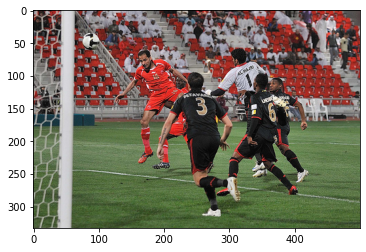

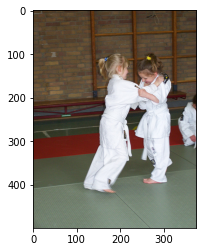

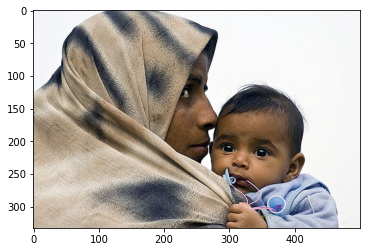

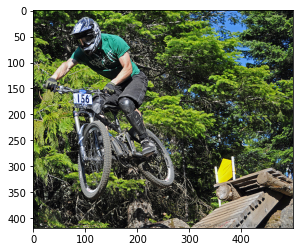

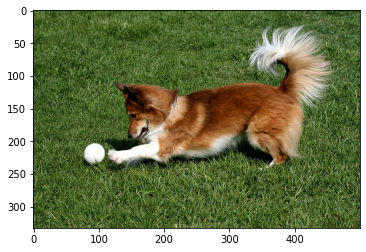

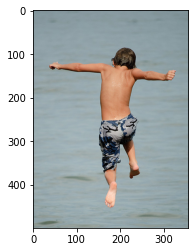

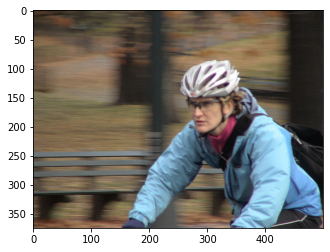

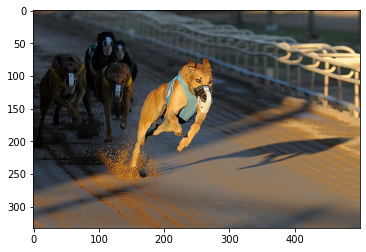

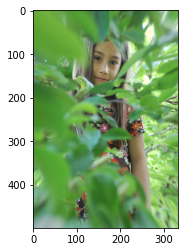

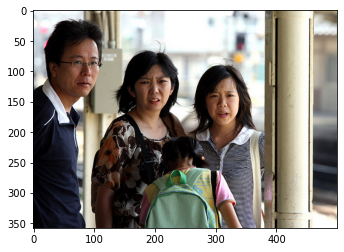

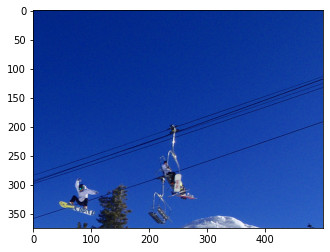

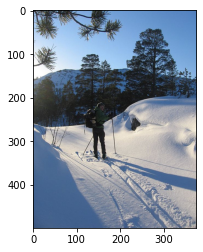

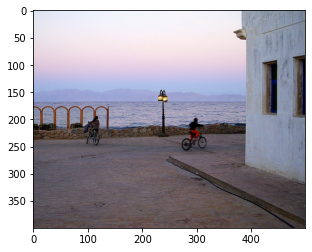

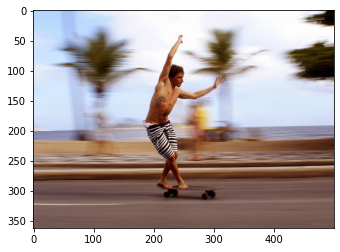

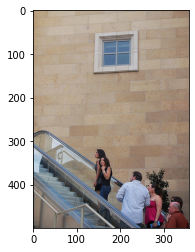

In [ ]:
for i in range(15):
  idx = np.random.randint(0,1000)
  allimg = list(encodetest.keys())
  imgname = allimg[idx]
  photo_2048 = encodetest[imgname].reshape((1,2048))
  i = plt.imread(imgp + imgname + ".jpg")
  plt.imshow(i)
  plt.axis("off")
  plt.show()
  caption = predcap(photo_2048)
  print(caption)